### 수면의 질에 관한 상관관계
- 데이터 : Sleep_health_and_lifestyle_dataset.csv
- 타겟 몇 개를 제외하고 전체를 피쳐를 잡거나 2개~3개로 피쳐로 잡아서 관계 알아보기
- 피쳐 : Heart Rate, Daily Steps
- 타겟 : sleep Disorder
- 기계학습 : 지도학습 + 분류
- KNN Classifier

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
data = './data/Sleep_health_and_lifestyle_dataset.csv'

In [58]:
sleepDF = pd.read_csv(data)
sleepDF

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [59]:
# 데이터 확인
sleepDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [60]:
# 중복데이터
sleepDF.duplicated().sum()

0

In [61]:
# 결측치 체크
sleepDF.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [62]:
# 결측치 None으로 대체
sleepDF = sleepDF.fillna('None')

In [63]:
sleepDF

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [64]:
# Sleep Apnea', 'Insomnia' 두 가지 데이터만 추출 
mask = sleepDF['Sleep Disorder'].isin(['Sleep Apnea', 'Insomnia'])

# 해당 행만 도출
twosleepDF = sleepDF[mask]

# 인덱스 정리
twosleepDF = twosleepDF.reset_index(drop=True)

In [65]:
# 피쳐 데이터 추출
feature = twosleepDF[twosleepDF.columns[10:12]]
feature.head()

,Heart Rate,Daily Steps
0,85,3000
1,85,3000
2,85,3000
3,82,3500
4,80,4000


In [66]:
# 타겟 데이터 추출
target = twosleepDF['Sleep Disorder']

target=target.replace({'Sleep Apnea':0, 'Insomnia':1}).copy()

# 데이터 확인
print(target.head(3), target.tail(3), sep='\n\n')

0    0
1    0
2    1
Name: Sleep Disorder, dtype: int64

152    0
153    0
154    0
Name: Sleep Disorder, dtype: int64


In [67]:
# 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [68]:
#(4-1) KNN 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [69]:
#(4-2) 학습 진행 fit(2D, 1D)
model.fit(feature, target)

KNeighborsClassifier()

In [70]:
# 학습 후 속성 확인 => 속성명_ : 모델 파라미터 -> 모델 학습 후 생성 및 저장됨!
print("classes_ : ", model.classes_)
print("feature_names_in_ : ", model.feature_names_in_)
print("n_features_in_ : ", model.n_features_in_)

classes_ :  [0 1]
feature_names_in_ :  ['Heart Rate' 'Daily Steps']
n_features_in_ :  2


In [71]:
model.score(feature, target)

0.8838709677419355

In [72]:
# [Sleep Duration, Quality of Sleep]
new_data = pd.DataFrame([[5.9, 4]], columns=model.feature_names_in_)

# 학습 시 제공된 데이터와 동일한 형태로 제공
pred_y = model.predict(new_data)

pred_y

array([0], dtype=int64)

In [73]:
# 예측 확률
model.predict_proba(new_data)

array([[0.8, 0.2]])

In [74]:
# 데이터와 최근접 이웃 데이터기 => kneighbors() 메서드
# 반환값 : 거리, 원소번호
dis, ind = model.kneighbors(new_data)

# ndarray => list
ind.tolist()[0]

[1, 2, 0, 19, 13]

In [75]:
# K개의 최근접 이웃 데이터만 저장
kneighDF = feature.iloc[ind.tolist()[0]]

In [76]:
feature.index, feature.shape

(RangeIndex(start=0, stop=155, step=1), (155, 2))

<Axes: xlabel='Heart Rate', ylabel='Daily Steps'>

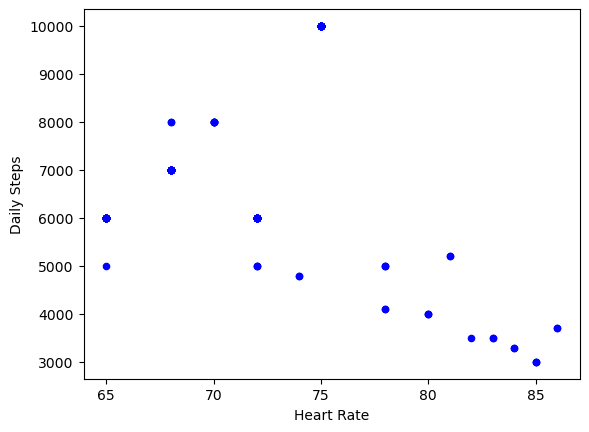

In [77]:
feature.plot.scatter(x='Heart Rate', y='Daily Steps', c='blue')

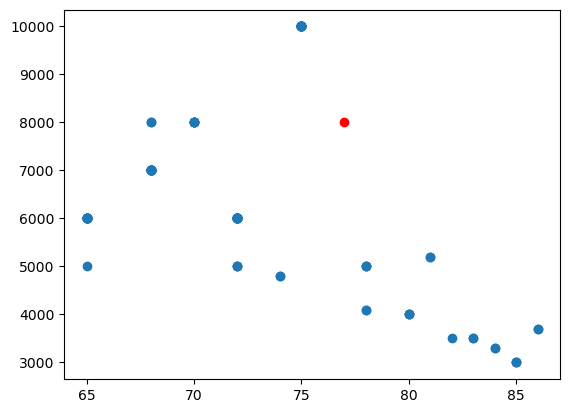

In [78]:
import matplotlib.pyplot as plt

plt.scatter(x=twosleepDF['Heart Rate'], y=twosleepDF['Daily Steps'])

# 새로운 데이터 시각화
new_data['Heart Rate'].to_list()[0], new_data['Daily Steps'].to_list()[0]

# 새로운 데이터d의 K개 최근접 이웃 데이터 시각화
plt.plot(77, 8000, 'ro')

plt.show()

In [79]:
x, y = model.kneighbors(new_data)
x, y

(array([[2997.04401202, 2997.04401202, 2997.04401202, 3296.92517507,
         3296.92517507]]),
 array([[ 1,  2,  0, 19, 13]], dtype=int64))

In [80]:
feature

,Heart Rate,Daily Steps
0,85,3000
1,85,3000
2,85,3000
3,82,3500
4,80,4000
...,...,...
150,68,7000
151,68,7000
152,68,7000
153,68,7000


In [81]:
feature.loc[y[0]]

,Heart Rate,Daily Steps
1,85,3000
2,85,3000
0,85,3000
19,84,3300
13,84,3300


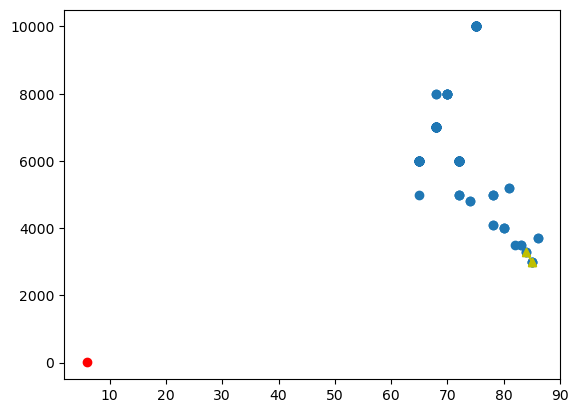

In [82]:
# 데이터 시각화
plt.scatter(x=twosleepDF['Heart Rate'], y=twosleepDF['Daily Steps'])

# 새로운 데이터 시각화
plt.plot(new_data['Heart Rate'].to_list()[0], new_data['Daily Steps'].to_list()[0]
, 'ro')

# 새로운 데이터의 K개 최근접 이웃 데이터 시각화
plt.plot(kneighDF['Heart Rate'], kneighDF['Daily Steps'], 'y^-')

plt.show()